In [68]:
import os.path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
csv_files = [fn for fn in os.listdir("ts.csv") if fn.endswith("csv")]
ts = pd.read_csv(f"ts.csv/{csv_files[0]}")

FileNotFoundError: [Errno 2] No such file or directory: 'ts.csv'

In [3]:

sns.barplot(data=ts, x="datetime", y="value")

NameError: name 'ts' is not defined

In [16]:
Gent_1M_files = [fn for fn in os.listdir("../local_data_Gent_1M_clean/7073_data/") if fn.endswith("csv")]
ts = pd.read_csv(f"../local_data_Gent_1M_clean/7073_data/{Gent_1M_files[0]}", parse_dates=["datetime", "date"])

In [17]:
ts

,timestamp,value,datetime,date,avg
0,1688076000000,0.5,2023-06-29 22:00:00,2023-06-29,0.250000
1,1688079600000,0.0,2023-06-29 23:00:00,2023-06-29,0.250000
2,1688083200000,0.5,2023-06-30 00:00:00,2023-06-30,1.354167
3,1688086800000,0.5,2023-06-30 01:00:00,2023-06-30,1.354167
4,1688090400000,1.0,2023-06-30 02:00:00,2023-06-30,1.354167
...,...,...,...,...,...
764,1690826400000,1.0,2023-07-31 18:00:00,2023-07-31,0.608696
765,1690830000000,0.5,2023-07-31 19:00:00,2023-07-31,0.608696
766,1690833600000,0.0,2023-07-31 20:00:00,2023-07-31,0.608696
767,1690837200000,0.0,2023-07-31 21:00:00,2023-07-31,0.608696


In [59]:
ts["week"] = [x.isocalendar().week for x in ts.date]
ts["dayofweek"] = [x.dayofweek for x in ts.date]
ts["hour"] = [x.time().hour for x in ts.datetime]

In [60]:
ts

,timestamp,value,datetime,date,avg,week,dayofweek,hour
0,1688076000000,0.5,2023-06-29 22:00:00,2023-06-29,0.250000,26,3,22
1,1688079600000,0.0,2023-06-29 23:00:00,2023-06-29,0.250000,26,3,23
2,1688083200000,0.5,2023-06-30 00:00:00,2023-06-30,1.354167,26,4,0
3,1688086800000,0.5,2023-06-30 01:00:00,2023-06-30,1.354167,26,4,1
4,1688090400000,1.0,2023-06-30 02:00:00,2023-06-30,1.354167,26,4,2
...,...,...,...,...,...,...,...,...
764,1690826400000,1.0,2023-07-31 18:00:00,2023-07-31,0.608696,31,0,18
765,1690830000000,0.5,2023-07-31 19:00:00,2023-07-31,0.608696,31,0,19
766,1690833600000,0.0,2023-07-31 20:00:00,2023-07-31,0.608696,31,0,20
767,1690837200000,0.0,2023-07-31 21:00:00,2023-07-31,0.608696,31,0,21


In [61]:
weekmatrix = ts[["avg", "dayofweek", "week"]].drop_duplicates().pivot(values="avg", columns="dayofweek", index="week")
daymatrix = ts[["value", "date", "hour"]].drop_duplicates().pivot(values="value", columns="hour", index="date")
daymatrix.index = daymatrix.index.date#.strftime('%Y/%m/%d, %r')

<Axes: xlabel='dayofweek', ylabel='week'>

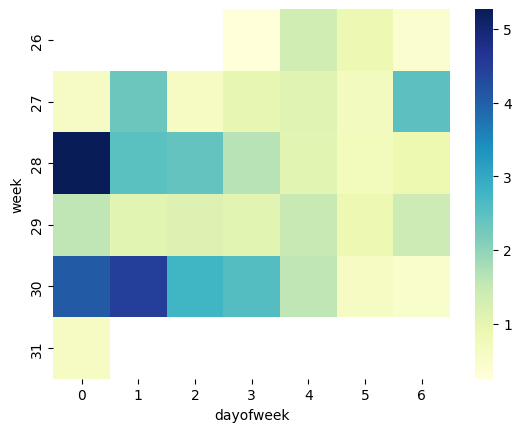

In [66]:
sns.heatmap(weekmatrix, cmap="YlGnBu")

<Axes: xlabel='hour'>

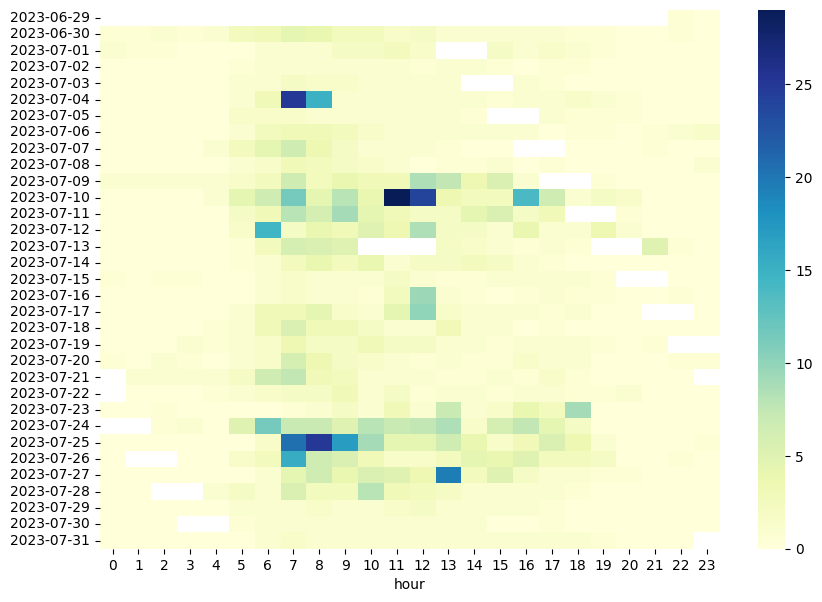

In [73]:
plt.figure(figsize=(10,7))
sns.heatmap(daymatrix, cmap="YlGnBu")